
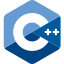
<br>

<div style="text-align:center; font-size:200%;">
  <b>SOLID: OCP (Part 2)</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Academy Munich</div>
<br/>
<!-- 06 SOLID OCP (Part 2).ipynb -->
<!-- slides/module_500_solid_grasp/topic_340_solic_ocp_part2.cpp -->


## Recap: OCP Violation

<img src="img/movie_v0.svg" alt="MovieV0"
     style="display:block;margin:auto;width:50%"/>


## Solution Proposal 1: Inheritance

<img src="img/movie_v2.svg" alt="MovieV2"
     style="display:block;margin:auto;width:70%"/>


- OCP is satisfied
- Large scope of inheritance
  - Price computation is the most important thing about movies?
- Only one-dimensional classification
- No possibility to change pricing scheme


## Solution Proposal 2: Strategy Pattern

<img src="img/movie_v3.svg" alt="MovieV3"
     style="display:block;margin:auto;width:80%"/>


- OCP is satisfied
- Inheritance is limited to price computation
- Multi-dimensional classification is easy
- Pricing scheme can be changed at runtime


## Implementation

In [ ]:
#include <iostream>
#include <memory>
#include <string>
#include <vector>

In [ ]:
class Movie;

In [ ]:
class PricingStrategy {
public:
    virtual ~PricingStrategy() = default;
    virtual double ComputePrice(const Movie&) const = 0;
};

In [ ]:
class RegularPriceStrategy : public PricingStrategy {
public:
    double ComputePrice(const Movie&) const override { return 4.99; }
};

In [ ]:
class ChildrenPriceStrategy : public PricingStrategy {
public:
    double ComputePrice(const Movie&) const override { return 5.99; }
};

In [ ]:
class NewReleasePriceStrategy : public PricingStrategy {
public:
    double ComputePrice(const Movie&) const override { return 6.99; }
};

In [ ]:
class Movie {
public:
    Movie(std::string title, std::unique_ptr<PricingStrategy> pricing_strategy)
        : title_(std::move(title)), pricing_strategy_(std::move(pricing_strategy)) {}

    double ComputePrice() const { return pricing_strategy_->ComputePrice(*this); }

    void PrintInfo() const {
        std::cout << title_ << " costs " << ComputePrice() << std::endl;
    }

private:
    std::string title_;
    std::unique_ptr<PricingStrategy> pricing_strategy_;
};

In [ ]:
std::vector<Movie> movies;
movies.emplace_back("Casablanca", std::make_unique<RegularPriceStrategy>());
movies.emplace_back("Shrek", std::make_unique<ChildrenPriceStrategy>());
movies.emplace_back("Brand New", std::make_unique<NewReleasePriceStrategy>());

In [ ]:
for (const auto& movie : movies) {
    movie.PrintInfo();
}


## Workshop: Transport Fare Calculation System

In a modern city, there are various modes of transportation available –
buses, subways, trains, boats, etc. Each of these transportation modes has
its own fare calculation method. For instance, bus fares might be based on
flat rates, subways might use distance-based rates, and boats might have
premium rates for scenic routes.


You are given a rudimentary fare calculation system that determines the fare
based on transportation type. Unfortunately, this system violates the OCP
since it isn't open for extension without modification. Every time a new
transportation mode needs to be added, the core system needs to be modified.

Your task is to refactor the system to adhere to the OCP. More specifically,
you'll remove the `switch` statement in the fare calculation logic. The goal
is to make the system easily extendable, allowing new transportation types to
be added without modifying the existing code.

In [ ]:
#include <iostream>

In [ ]:
enum class TransportType
{
    BUS,
    SUBWAY,
    TRAIN,
    BOAT
};

In [ ]:
class Transport {
public:
    Transport(TransportType type) : type_(type) {}

    double CalculateFare(double distance) {
        switch (type_) {
        case TransportType::BUS: return 2.50; // flat rate
        case TransportType::SUBWAY:
            return 1.50 + (distance * 0.20); // base rate + per km
        case TransportType::TRAIN:
            return 5.00 + (distance * 0.15);    // base rate + per km
        case TransportType::BOAT: return 10.00; // premium rate
        default: return 0.0;
        }
    }

private:
    TransportType type_;
};

In [ ]:
Transport bus(TransportType::BUS);
std::cout << "Bus fare: $" << bus.CalculateFare(10) << "\n";

In [ ]:
Transport subway(TransportType::SUBWAY);
std::cout << "Subway fare: $" << subway.CalculateFare(10) << "\n";

In [ ]:
Transport train(TransportType::TRAIN);
std::cout << "Train fare: $" << train.CalculateFare(10) << "\n";

In [ ]:
Transport boat(TransportType::BOAT);
std::cout << "Boat fare: $" << boat.CalculateFare(10) << "\n";

In [ ]:
#include <iostream>
#include <memory>

In [ ]:
class FareCalculationStrategy {
public:
    FareCalculationStrategy() = default;
    FareCalculationStrategy(const FareCalculationStrategy&) = delete;
    FareCalculationStrategy& operator=(const FareCalculationStrategy&) = delete;
    FareCalculationStrategy(FareCalculationStrategy&&) = delete;
    FareCalculationStrategy& operator=(FareCalculationStrategy&&) = delete;
    virtual ~FareCalculationStrategy() = default;

    virtual double CalculateFare(double distance) = 0;
};

In [ ]:
class BusFare : public FareCalculationStrategy {
public:
    double CalculateFare(double distance) override {
        return 2.50; // flat rate
    }
};

In [ ]:
class SubwayFare : public FareCalculationStrategy {
public:
    double CalculateFare(double distance) override {
        return 1.50 + (distance * 0.20); // base rate + per km
    }
};

In [ ]:
class TrainFare : public FareCalculationStrategy {
public:
    double CalculateFare(double distance) override {
        return 5.00 + (distance * 0.15); // base rate + per km
    }
};

In [ ]:
class BoatFare : public FareCalculationStrategy {
public:
    double CalculateFare(double distance) override {
        return 10.00; // premium rate
    }
};

In [ ]:
class Transport {
public:
    Transport(std::unique_ptr<FareCalculationStrategy> fareStrategy)
        : fareStrategy_{std::move(fareStrategy)} {}

    double ComputeFare(double distance) { return fareStrategy_->CalculateFare(distance); }

private:
    std::unique_ptr<FareCalculationStrategy> fareStrategy_;
};

In [ ]:
Transport bus(std::make_unique<BusFare>());
std::cout << "Bus fare: $" << bus.ComputeFare(10) << "\n";

In [ ]:
Transport subway(std::make_unique<SubwayFare>());
std::cout << "Subway fare: $" << subway.ComputeFare(10) << "\n";

In [ ]:
Transport train(std::make_unique<TrainFare>());
std::cout << "Train fare: $" << train.ComputeFare(10) << "\n";

In [ ]:
Transport boat(std::make_unique<BoatFare>());
std::cout << "Boat fare: $" << boat.ComputeFare(10) << "\n";


## Extra Workshop: Smart Home Device Control System with Strategy

In an earlier workshop we implemented a Smart Home Device Control System.

Solve the OCP problem for this system with the Strategy pattern.

In [ ]:
class DeviceStrategy {
public:
    virtual ~DeviceStrategy() = default;
    virtual void Control() = 0;
    virtual void GetStatus() const = 0;
};

In [ ]:
#include <iostream>

In [ ]:
class LightStrategy : public DeviceStrategy {
public:
    void Control() override { std::cout << "Light control\n"; }
    void GetStatus() const override { std::cout << "Light status\n"; }
};

In [ ]:
class ThermostatStrategy : public DeviceStrategy {
public:
    void Control() override { std::cout << "Thermostat control\n"; }
    void GetStatus() const override { std::cout << "Thermostat status\n"; }
};

In [ ]:
class SecurityCameraStrategy : public DeviceStrategy {
public:
    void Control() override { std::cout << "Security camera control\n"; }
    void GetStatus() const override { std::cout << "Security camera status\n"; }
};

In [ ]:
class SmartLockStrategy : public DeviceStrategy {
public:
    void Control() override { std::cout << "Smart lock control\n"; }
    void GetStatus() const override { std::cout << "Smart lock status\n"; }
};

In [ ]:
#include <memory>

In [ ]:
class SmartHomeDevice {
public:
    SmartHomeDevice(std::unique_ptr<DeviceStrategy> strategy)
        : strategy_{std::move(strategy)} {}

    void Control() { strategy_->Control(); }
    void GetStatus() { strategy_->GetStatus(); }

private:
    std::unique_ptr<DeviceStrategy> strategy_;
};

In [ ]:
#include <vector>

In [ ]:
std::vector<SmartHomeDevice> devices;

In [ ]:
devices.emplace_back(std::make_unique<LightStrategy>());
devices.emplace_back(std::make_unique<ThermostatStrategy>());
devices.emplace_back(std::make_unique<SecurityCameraStrategy>());
devices.emplace_back(std::make_unique<SmartLockStrategy>());

In [ ]:
for (auto& device : devices) {
    device.Control();
    device.GetStatus();
}